In [4]:
from basicimports import *


Last ran on /home/tboland1/Dropbox/Crozier Group User- Tara Boland/pymatgen from 2019-03-14 16:53:10.546709. 

home is /home/tboland1/Dropbox/TaraB/DFT/


In [ ]:
from pymatgen.io.vasp.sets import MPRelaxSet
from atomate.vasp.config import SMALLGAP_KPOINT_MULTIPLY, \
    STABILITY_CHECK, VASP_CMD, DB_FILE, \
    ADD_WF_METADATA, ADD_NAMEFILE
from atomate.vasp.workflows.base.core import get_wf
from atomate.vasp.powerups import add_small_gap_multiply, \
    add_stability_check, add_modify_incar, \
    add_wf_metadata, add_common_powerups

def wf_struct_opt(structure, vasp_input_set, c=None):
    c = c or {}
    c['ADD_WF_METADATA']=ADD_WF_METADATA
    c['ADD_NAMEFILE']=ADD_NAMEFILE
    vasp_cmd = c.get("VASP_CMD", VASP_CMD)
    db_file = c.get("DB_FILE", DB_FILE)
    user_incar_settings = c.get("USER_INCAR_SETTINGS")
    
    # vasp inputs
    vasp_input_set = vasp_input_set or MPRelaxSet(structure,
        user_incar_settings=user_incar_settings)
    wf = get_wf(structure, "optimize_only.yaml",
                vis=vasp_input_set,
                common_params={"vasp_cmd": vasp_cmd,
                               "db_file": db_file})

    wf = add_common_powerups(wf, c)
    wf = add_wf_metadata(wf, structure)

    return wf


Atomate Customizing WF

In [ ]:
# create custom wf
from fireworks import Workflow
from atomate.vasp.fireworks.core import OptimizeFW
from pymatgen.io.vasp.sets import MPRelaxSet
from pymatgen import Structure

def get_gb_optimize_wf(structure, name="GB optimization wf", vasp_input_set=None,
                    vasp_cmd="vasp", db_file=None, user_kpoints_settings=None,
                    tag="", metadata=None):
    """
    Returns a structure optimization workflow.

    Args:
        structure (Structure): input structure to be optimized and run
        name (str): some appropriate name for the transmuter fireworks.
        vasp_input_set (DictSet): vasp input set.
        vasp_cmd (str): command to run
        db_file (str): path to file containing the database credentials.
        user_kpoints_settings (dict): example: {"grid_density": 7000}
        tag (str): some unique string that will be appended to the names of the fireworks so that
            the data from those tagged fireworks can be queried later during the analysis.
        metadata (dict): meta data

    Returns:
        Workflow
    """
    # input set for relaxation
    vis_relax = vasp_input_set or MPRelaxSet(structure, potcar_functional='PBE_54')
    if user_kpoints_settings:
        v = vis_relax.as_dict()
        v.update({"user_kpoints_settings": user_kpoints_settings})
        vis_relax = vis_relax.__class__.from_dict(v)

    # Structure optimization firework
    fws = [OptimizeFW(structure=structure, vasp_input_set=vis_relax, vasp_cmd=vasp_cmd,
                      db_file=db_file, name="{} structure optimization".format(tag))]

    wfname = "{}:{}".format(structure.composition.reduced_formula, name)

    return Workflow(fws, name=wfname, metadata=metadata)

# load your structure, e.g. from a POSCAR
struct = Structure.from_file('POSCAR')

# create a custom input set
my_custom_input_set = MPRelaxSet(struct)

# create the workflow
my_wf = get_optimize_wf(struct, vasp_input_set=my_custom_input_set)

In [ ]:
# define out input set
from pymatgen.io.vasp.sets import MPRelaxSet
from pymatgen.io.vasp.inputs import Kpoints
from pymatgen import Structure
def GBInputSet(MPRelaxSet):
    def __init__(self, structure,  shift=(0,0,0), **kwargs):
        super(MPRelaxSet, self).__init__(structure,
                                         MPRelaxSet.CONFIG,
                                         potcar_functional = 'PBE_54', **kwargs)
        self.points = points
        self.shift = shift
        self
        
    @property
    def kpoints(self):
        # choose either of these
        # use Monkhorst-Pack scheme
        return Kpoints.monkhorst_automatic(kpts=self.points, shift=self.shift)
        # use a Gamma centered scheme
        return Kpoints.gamma_automatic(kpts=self.points, shift=self.shift)


# Hard Relaxation Convergence

In [ ]:
ADDGRID = True                                                                  
ALGO = Fast                                                                     
EDIFF = 1e-07                                                                   
EDIFFG = -0.01                                                                  
ENAUG = 1040                                                                    
ENCUT = 520                                                                     
IBRION = 3                                                                      
ICHARG = 1                                                                      
ISIF = 2                                                                        
ISMEAR = 0                                                                      
ISPIN = 1                                                                       
ISYM = 0                                                                        
KPAR = 2                                                                        
LORBIT = 11                                                                     
LREAL = Auto                                                                    
LWAVE = False                                                                   
MAGMOM = 46*5.0 96*0.6                                                          
NELM = 100                                                                      
NPAR = 5                                                                        
NSW = 99                                                                        
POTIM = 0.125                                                                   
PREC = High                                                                     
SIGMA = 0.1                                                                     
SMASS = 0.75

In [ ]:
ADDGRID = True
ALGO = Normal
EDIFF = 1e-07
EDIFFG = -0.01
ENAUG = 1040
ENCUT = 520 
IBRION = 2 
ICHARG = 1 
IMIX = 1 
ISIF = 2 
ISMEAR = -5
ISPIN = 1 
ISTART = 1 
ISYM = 0 
KPAR = 2 
LDAU = True
LDAUJ = 0 0 0 
LDAUL = 3 -1 -1
LDAUPRINT = 1 
LDAUTYPE = 2 
LDAUU = 5 0 0 
LMAXMIX = 6 
LORBIT = 11
LREAL = False
LWAVE = False
MAGMOM = 46*5.0 96*0.6
NELM = 100 
NPAR = 4 
NSW = 99
PREC = High
SIGMA = 0.1

### 1.0 Initial Relax

Without spin BMIX = 0.0001 AMIX = 0.28 mag are fine

With spin: AMIX = 0.35, BMIX = 0.0001, AMIX_MAG  = 0.80, BMIX_MAG  = 0.0001

In [ ]:
## edit
for  in :
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    from basicimports import set_u
    
    path = wd +  + '/'
    try:
        os.makedirs(path)
    except:
        path = path
    
    # create the structure
    struct = 
    struct.remove_oxidation_states()
    struct.to(filename = path+'POSCAR_'+, fmt='POSCAR')
    
    
    # create INCAR
    
    # write out ldau tags for ce
    ul, uu = set_u(struct)
    incar_tags= dict(
        System = " initial relax",
        
        IALGO = 38,
        NPAR =,
        NSIM = 6,
        KPAR = 1,
        
        IBRION = 2,
        ISIF = 3,
        NSW = 100,
        POTIM = 0.1,
        EDIFFG = -0.01,
        
        ISYM = 0,
        
        LDAU = '.TRUE.',
        LDAUTYPE = 2,
        LMAXMIX = 6,
        LDAUL = ul,
        LDAUU = uu,
        LDAUJ = [0]*len(struct.symbol_set),
        
        ISMEAR = 0,
        SIGMA = 0.1,
        ISPIN = 1,
        AMIX = 0.28,
        BMIX = 0.0001,
        
        LREAL = 'Auto',
        
        ENCUT = 520,
        EDIFF = 0.1E-05)
    incar = Incar.from_dict(incar_tags)
    incar.write_file(path+'INCAR')
    
    
    # create KPOINTS
    kp_file = Kpoints.automatic_density(structure=struct,kppa=400)
    kp_file.write_file(path+'KPOINTS')
    
    
    # create POTCAR
    potcar = Potcar(symbols=[i.replace('populate_me','_sv')
                     for i in struct.symbol_set],functional="PBE")
    potcar.write_file(path+'POTCAR')
    
    
    # slurm for each calc
    with open(path + "parallel.sh", "w") as f:
        f.write(
            "#!/bin/bash\n"
            
            "#SBATCH -J  \n"
            
            "#SBATCH -t 1-00:00\n"
            "#SBATCH -n \n"
            
            "#SBATCH -q aggressive \n#SBATCH --mem-per-cpu=4000\n"
            "#SBATCH --exclusive\n#SBATCH -o error.%j.out\n"
            "module purge\n"
            
            "cd /scratch/tboland1/ "+  +  + "\n"
            
            "\nmodule load intel/2018x\nmodule load vasp/5.4.4-elpa\n"
            'export I_MPI_HYDRA_BOOTSTRAP_EXEC_EXTRA_ARGS="--cpu-bind=verbose,none"\n'
            "export I_MPI_HYDRA_BOOTSTRAP=slurm\nexport I_MPI_HYDRA_BOOTSTRAP_EXEC=srun\n\n\n"
            "mpiexec.hydra vasp_std")

### 1.1 Higher KP Relax
* Check DOS from prior run to make sure the calculation is insulting
* Ensure that the ediff accounts for the power in the total energy

In [ ]:
System = "High KP relax",
ISPIN = 2,
MAGMOM = ' '.join([str(el) for el in [5]*12+[0.6]*24]*gb_flag),

kp_file = Kpoints.automatic_density(structure=struct,kppa=800)
kp_file.write_file(path+'KPOINTS')

#### 1.4.0 Relax Converge Checks -- spE

In [ ]:
System = "spin final E"
ENCUT = 400
ISIF = 2
NSW = 0
IBRION = -1
ISPIN = 2
# copy chgcar & wavecar
EDIFF = 0.1E-05
# Remove EDIFFG, and POTIM from dict

# NEB Relax INCAR

In [ ]:
# create NEB INCAR
relax_init_incar = Incar.from_file(wd+'../INCAR')
## edit
relax_init_incar['System'] = "NEB    image relax"
relax_init_incar['NPAR']   = 2
relax_init_incar['KPAR']   = 1
relax_init_incar['ENCUT']  = 400
relax_init_incar['ISIF']   = 2

relax_init_incar['IBRION'] = 3
relax_init_incar["LSCALAPACK"]=".FALSE."
relax_init_incar['ISYM']   = 0
relax_init_incar["NSW"]    = 500
relax_init_incar["LCLIMB"] = ".TRUE."
relax_init_incar["ICHAIN"] = 0
relax_init_incar['SPRING'] = -5
relax_init_incar['IMAGES'] = len(neb_structs)-2
relax_init_incar['POTIM']  = 0
relax_init_incar['EDIFFG'] = -0.01
relax_init_incar['EDIFF']  = 0.1E-05
relax_init_incar.write_file(path+'INCAR')

# Bader Analysis

In [ ]:
# edits
    relax_init_incar['ENCUT']  = 400
    relax_init_incar['ISIF']   = 2
    relax_init_incar['NSW']    = 0
    relax_init_incar['IBRION'] = -1
    relax_init_incar['ISPIN']  = 1
    relax_init_incar['NGXF']   =
    relax_init_incar['NGYF']   =
    relax_init_incar['NGZF']   = 
    relax_init_incar['LAECHG'] ='.TRUE.'
    
    relax_init_incar.pop('EDIFFG')
    relax_init_incar.pop('POTIM')

### Random Tags

In [ ]:
struct.add_site_property('magmom',[2]*32+[0.5]*63)
relax_init_incar['MAGMOM'] = ' '.join(str(el) for el in [2]*32+[0.5]*63)
relax_init_incar['ISPIN']  = 2

For insulators 100 kp/ atom in the full brillouin zone is sufficient to reduce the energy error to less than 10 meV / atom. For metals 1000 kp/atom. For problematic cases (transition metals w/ steep DOS @ Fermi Level)  5000/atom gets you 1 meV/atom.  

In [76]:
Kpoints.automatic_density(structure=struct,kppa=5000)
# for a 2^3 ceo2 super cell

pymatgen 4.7.6+ generated KPOINTS with grid density = 5000 / atom
0
Gamma
3 3 3

### Pickling

In [ ]:
# Original pickling of 
with open(".pkl",'wb') as f:
    pickle.dump(,f)
# load Pickled var to save time
with open(".pkl", 'rb') as f:
    = pickle.load(f)

### NEB set up

In [ ]:
from pymatgen.io.vasp import Poscar
init_struct = Poscar.from_file(wd+'1vac/vac_loc/ispin2/magmom/m2x1/39/POSCAR').structure
final_struct = Poscar.from_file(wd+'1vac/vac_loc/ispin2/magmom/m2x1/78/POSCAR').structure
final_struct.modify_lattice(init_struct.lattice)
from pymatgen_diffusion.neb.pathfinder import IDPPSolver

obj = IDPPSolver.from_endpoints(
    endpoints=[init_struct,final_struct],
    nimages=4, sort_tol=.5)
for i,struct in enumerate(obj.structures):
    p = Poscar(struct)
    p.write_file('POSCAR'+str(i))

newpath=obj.run(maxiter=5000,gtol=1e-3,species=['O'])

for i,struct in enumerate(newpath):
    p = Poscar(struct)
    p.write_file('POSCAR'+str(i))


- - - - - 
- - - - - 
usage for vasprun.xml file
- - - - -
- - - - -
# Plot the DOS for this DFT run  
* use the vasprun file to obtain the complete DOS

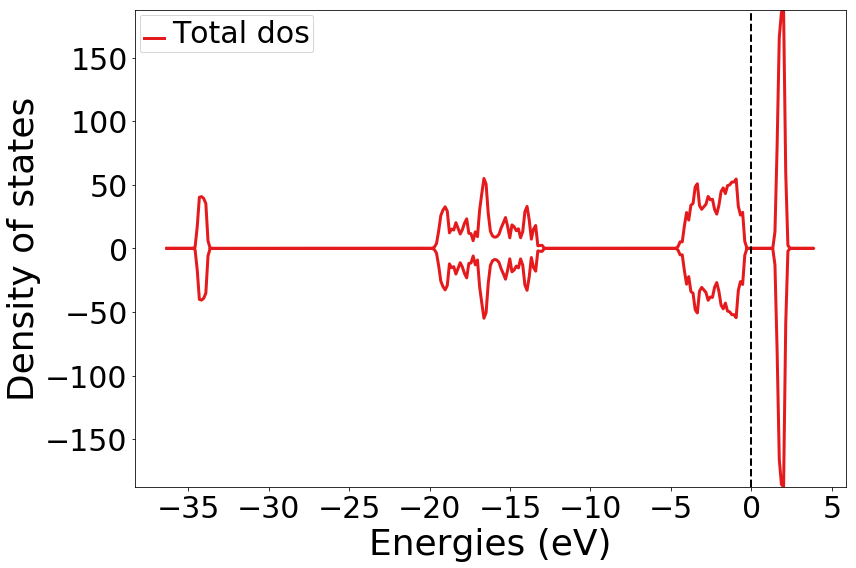

In [27]:
from pymatgen.electronic_structure.plotter import DosPlotter
comp_dos = vasprun.complete_dos
plotter = DosPlotter()
plotter.add_dos("Total dos",comp_dos)
plotter.show()

In [81]:
# adjust occupancy
# 1. simplify Li occupancy to 0.625
# 2. Ge/P sites fixed as Ge and P.
#for i, site in enumerate(structure):
#    if not site.is_ordered:
#        if structure[i]["Li+"] == 0.466:
#            structure[i] = {"Li+": 0.625}
#        elif structure[i]["Li+"] == 0.74 or structure[i]["Li+"] == 0.81 or structure[i]["Li+"] == 0.86:
##            structure[i] = {"Li+": 0.625}
 #       else:
 ##           if round(site.coords[0], 6) == 4.3595:
  #              structure[i] = {"Ge4+": 1.0}
  #          elif round(site.coords[0], 6) == 0:
  #              structure[i] = {"P5+": 1.0}

### Data obtainable from the vasprun.xml file
* KP data obtained from vasprun.xml file
* initial & final structs
* to much to really comprehend.

# Band structure related

In [25]:
vasprun.get_band_structure()

In [26]:
# code to plot bandstructure along symmetry lines
'''
bz_lattice = vasprun.lattice_rec
bs = vasprun.get_band_structure()
kpoints = vasprun.kpoints
labels = vasprun.kpoints.labels
fold = True
from pymatgen.electronic_structure.plotter import BSPlotter
bsp = BSPlotter(bs)
#bsp. plot_brillouin()
#lot_brillouin_zone(bz_lattice=bz_lattice,kpoints=kpoints, fold=fold)
'''
print()

In [27]:
vasprun.idos

In [28]:
vasprun.pdos

[]

In [29]:
vasprun.projected_eigenvalues

In [30]:
vasprun.tdos

# Ionic relaxation related

In [31]:
vasprun.ionic_step_offset

0

In [32]:
vasprun.ionic_steps

[{'e_fr_energy': -579.22936827,
  'e_wo_entrp': -579.22936827,
  'e_0_energy': -0.0,
  'forces': [[-0.00168013, -0.00106876, -0.00106876],
   [0.00350032, 0.00210448, 0.00210448],
   [-0.00145585, -5.929e-05, -5.929e-05],
   [-0.00168013, -0.00106876, -0.00106876],
   [0.00350032, 0.00210448, 0.00210448],
   [-0.00145585, -5.929e-05, -5.929e-05],
   [0.00350032, 0.00210448, 0.00210448],
   [-0.00145585, -5.929e-05, -5.929e-05],
   [-0.00168013, -0.00106876, -0.00106876],
   [-0.00168013, -0.00106876, -0.00106876],
   [0.00350032, 0.00210448, 0.00210448],
   [-0.00145585, -5.929e-05, -5.929e-05],
   [0.00040623, -0.00099033, -0.00099033],
   [-0.00086497, -0.00147634, -0.00147634],
   [0.00163919, 0.00303504, 0.00303504],
   [-0.00086497, -0.00147634, -0.00147634],
   [0.00163919, 0.00303504, 0.00303504],
   [0.00040623, -0.00099033, -0.00099033],
   [-0.00086497, -0.00147634, -0.00147634],
   [0.00163919, 0.00303504, 0.00303504],
   [0.00040623, -0.00099033, -0.00099033],
   [-0.000864

In [33]:
vasprun.ionic_step_offset

0

In [34]:
vasprun.nionic_steps

1

# Random vasp details

In [35]:
#vasprun.from_dict()

In [36]:
# get the atomic symbols for the files
atom_sym = vasprun.atomic_symbols

In [37]:
vasprun.is_spin

True

In [38]:
vasprun.occu_tol

1e-08

# Optical/dielectric

In [39]:
#vasprun.optical_absorption_coeff

In [40]:
vasprun.other_dielectric

{}

# Run related

In [41]:
vasprun.generator

{'program': 'vasp',
 'version': '5.4.4.18Apr17-6-g9f103f2a35',
 'subversion': '(build Nov 09 2018 06:40:05) complex            parallel',
 'platform': 'LinuxIFC',
 'date': '2018 11 28',
 'time': '13:51:36'}

In [42]:
vasprun.get_computed_entry()

ComputedStructureEntry None - Ce24 O48
Energy = -579.2294
Correction = 0.0000
Parameters:
potcar_symbols = ['PAW_PBE Ce 23Dec2003', 'PAW_PBE O 08Apr2002']
run_type = GGA+U
is_hubbard = True
potcar_spec = [{'titel': 'PAW_PBE Ce 23Dec2003', 'hash': '5ba9e8be431d6cd8cfb153f83a69d842'}, {'titel': 'PAW_PBE O 08Apr2002', 'hash': '9bb4b91e6c47f70fd2bce603bd5d6832'}]
hubbards = {'Ce': 5.0, 'O': 0.0}
Data:

In [43]:
vasprun.parameters

{'SYSTEM': '(Ce60 O119)2 POSCAR-112-FINAL-NONSTOIC-',
 'LCOMPAT': False,
 'PREC': 'normal',
 'ENMAX': 400.0,
 'ENAUG': 605.392,
 'EDIFF': 1e-05,
 'IALGO': 38,
 'IWAVPR': 10,
 'NBANDS': 381,
 'NELECT': 576.0,
 'TURBO': 0,
 'IRESTART': 0,
 'NREBOOT': 0,
 'NMIN': 0,
 'EREF': 0.0,
 'ISMEAR': 0,
 'SIGMA': 0.1,
 'KSPACING': 0.5,
 'KGAMMA': True,
 'LREAL': True,
 'ROPT': [-0.0005, -0.0005],
 'LMAXPAW': -100,
 'LMAXMIX': 6,
 'NLSPLINE': False,
 'ISTART': 1,
 'ICHARG': 0,
 'INIWAV': 1,
 'ISPIN': 2,
 'LNONCOLLINEAR': False,
 'MAGMOM': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
 

In [44]:
vasprun.run_type

'GGA+U'

In [45]:
vasprun.hubbards

{'Ce': 5.0, 'O': 0.0}

# Potcar specifics

In [46]:
vasprun.potcar_spec

[{'titel': 'PAW_PBE Ce 23Dec2003', 'hash': '5ba9e8be431d6cd8cfb153f83a69d842'},
 {'titel': 'PAW_PBE O 08Apr2002', 'hash': '9bb4b91e6c47f70fd2bce603bd5d6832'}]

In [47]:
vasprun.update_potcar_spec

<bound method Vasprun.update_potcar_spec of <pymatgen.io.vasp.outputs.Vasprun object at 0x7fd344349ef0>>

In [48]:
vasprun.potcar_symbols

['PAW_PBE Ce 23Dec2003', 'PAW_PBE O 08Apr2002']

In [49]:
vasprun.update_charge_from_potcar

<bound method Vasprun.update_charge_from_potcar of <pymatgen.io.vasp.outputs.Vasprun object at 0x7fd344349ef0>>

In [50]:
vasprun.get_potcars

<bound method Vasprun.get_potcars of <pymatgen.io.vasp.outputs.Vasprun object at 0x7fd344349ef0>>

# Structural

In [51]:
structs = vasprun.structures

In [52]:
vasprun.lattice_rec

Lattice
    abc : 0.9453282636523603 0.9453282636523603 0.3192597712365499
 angles : 90.000000024894 89.999999975106 60.01220459975288
 volume : 0.24711181604638305
      A : -0.38599983858148285 -0.38585745216728473 0.7718572907487675
      B : 0.38599983858148285 -0.7718572907487675 0.38585745216728473
      C : 0.18432471463836517 0.1843247149780781 0.1843247149780781

In [53]:
vasprun.lattice

Lattice
    abc : 7.67384807379511 7.67384807379511 19.680479262525594
 angles : 89.99999995689292 90.00000004310711 119.98779540024711
 volume : 1003.7974606436441
      A : -5.42589632 -0.00066733 5.42656364
      B : 5.42589632 -5.42656364 0.00066733
      C : 11.36253 11.36253 11.36253

In [54]:
vasprun.to_json

<bound method MSONable.to_json of <pymatgen.io.vasp.outputs.Vasprun object at 0x7fd344349ef0>>